In [1]:
import numpy as np
import pandas as pd 
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import seaborn as sns
from pathlib import Path
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
marine_debris = pd.read_csv("cleaned_merged_marine_debris_location_na_dropped .csv")

In [3]:
marine_debris

,id,itemname,material,quantity,radius,lat,long,location,time,year,month
0,27,Paper Bags,BOAT PARTS,10,1,38.76261902,-9.09568119,Portugal,20190523095353,2019,5
1,27,Paper Bags,BOAT PARTS,5,1,24.98070908,-77.4573288,The Bahamas,20190218151204,2019,2
2,27,Paper Bags,BOAT PARTS,3,1,-4.6211772,55.45106434,Seychelles,20190326135719,2019,3
3,27,Paper Bags,BOAT PARTS,3,1,-4.73951688,55.51597932,Seychelles,20190328082534,2019,3
4,27,Paper Bags,BOAT PARTS,3,1,-4.73951692,55.51597929,Seychelles,20190328082536,2019,3
...,...,...,...,...,...,...,...,...,...,...,...
11764,21,Flip-flops,RUBBER,4,1,-6.6780125,71.364869,British Indian Ocean Territory,20211026094426,2021,10
11765,21,Flip-flops,RUBBER,3,1,-6.6780572,71.3649403,British Indian Ocean Territory,20211026094540,2021,10
11766,21,Flip-flops,RUBBER,3,1,-6.6781015,71.3650014,British Indian Ocean Territory,20211026094614,2021,10
11767,21,Flip-flops,RUBBER,3,1,-6.678212,71.3651906,British Indian Ocean Territory,20211026094745,2021,10


In [4]:
marine_debris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11769 non-null  object
 1   itemname  11769 non-null  object
 2   material  11769 non-null  object
 3   quantity  11769 non-null  object
 4   radius    11769 non-null  object
 5   lat       11769 non-null  object
 6   long      11769 non-null  object
 7   location  11769 non-null  object
 8   time      11769 non-null  object
 9   year      11769 non-null  object
 10  month     11769 non-null  object
dtypes: object(11)
memory usage: 1011.5+ KB


In [5]:
for x in marine_debris['radius'].unique():
    print(x)

1
5
2
10
6
4
9
12
24
3
25
19
8
7
54
222
115
90
43
30
97
60
17
20
18
quantity
13
100
29
11
37
65
15
40
16
229
118
51
48
331
21
14
73
22
33
50


In [6]:
removal = marine_debris[marine_debris['radius'].str.contains('quantity')]
marine_debris = marine_debris.drop(index=3157)

In [7]:
marine_debris.var()

Series([], dtype: float64)

In [8]:
marine_debris_1=marine_debris.drop(['id',"time","lat","long" ], axis=1)

In [9]:
marine_debris_1.isnull().values.any()

False

In [10]:
marine_debris_1.describe()

,itemname,material,quantity,radius,location,year,month
count,11768,11768,11768,11768,11768,11768,11768
unique,52,9,117,45,17,5,12
top,Foam Fragment,PLASTIC,3,1,British Indian Ocean Territory,2021,10
freq,2585,6073,6527,9723,7647,7878,3166


In [11]:
quantity=marine_debris_1["quantity"]
radius=marine_debris_1["radius"]
quantity
radius

0        1
1        1
2        1
3        1
4        1
        ..
11764    1
11765    1
11766    1
11767    1
11768    1
Name: radius, Length: 11768, dtype: object

In [12]:
marine_debris_1

,itemname,material,quantity,radius,location,year,month
0,Paper Bags,BOAT PARTS,10,1,Portugal,2019,5
1,Paper Bags,BOAT PARTS,5,1,The Bahamas,2019,2
2,Paper Bags,BOAT PARTS,3,1,Seychelles,2019,3
3,Paper Bags,BOAT PARTS,3,1,Seychelles,2019,3
4,Paper Bags,BOAT PARTS,3,1,Seychelles,2019,3
...,...,...,...,...,...,...,...
11764,Flip-flops,RUBBER,4,1,British Indian Ocean Territory,2021,10
11765,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021,10
11766,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021,10
11767,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021,10


In [13]:
marine_debris_1.drop(['month'], axis=1, inplace=True)

In [14]:
marine_debris_1

,itemname,material,quantity,radius,location,year
0,Paper Bags,BOAT PARTS,10,1,Portugal,2019
1,Paper Bags,BOAT PARTS,5,1,The Bahamas,2019
2,Paper Bags,BOAT PARTS,3,1,Seychelles,2019
3,Paper Bags,BOAT PARTS,3,1,Seychelles,2019
4,Paper Bags,BOAT PARTS,3,1,Seychelles,2019
...,...,...,...,...,...,...
11764,Flip-flops,RUBBER,4,1,British Indian Ocean Territory,2021
11765,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021
11766,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021
11767,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021


In [15]:
#5 years worth of data points
marine_debris_1['year'].value_counts()

2021    7878
2022    2296
2019    1328
2020     262
2018       4
Name: year, dtype: int64

In [16]:
marine_debris_1

,itemname,material,quantity,radius,location,year
0,Paper Bags,BOAT PARTS,10,1,Portugal,2019
1,Paper Bags,BOAT PARTS,5,1,The Bahamas,2019
2,Paper Bags,BOAT PARTS,3,1,Seychelles,2019
3,Paper Bags,BOAT PARTS,3,1,Seychelles,2019
4,Paper Bags,BOAT PARTS,3,1,Seychelles,2019
...,...,...,...,...,...,...
11764,Flip-flops,RUBBER,4,1,British Indian Ocean Territory,2021
11765,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021
11766,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021
11767,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021


In [17]:
marine_debris_2018=marine_debris_1.loc[marine_debris_1["year"] == '2018', :]
marine_debris_2019= marine_debris_1.loc[marine_debris_1["year"] == '2019', :]
marine_debris_2020=marine_debris_1.loc[marine_debris_1["year"] == '2020', :]
marine_debris_2021=marine_debris_1.loc[marine_debris_1["year"] == '2021', :]
marine_debris_2022=marine_debris_1.loc[marine_debris_1["year"] == '2022', :]

In [18]:
marine_debris_2018
marine_debris_2019
marine_debris_2020
marine_debris_2021
marine_debris_2022

,itemname,material,quantity,radius,location,year
15,Paper Bags,BOAT PARTS,16,1,Vietnam,2022
16,Paper Bags,BOAT PARTS,10,1,Vietnam,2022
17,Paper Bags,BOAT PARTS,13,1,Vietnam,2022
18,Paper Bags,BOAT PARTS,7,1,Vietnam,2022
19,Paper Bags,BOAT PARTS,1700,1,Vietnam,2022
...,...,...,...,...,...,...
10094,Flip-flops,RUBBER,28,1,Vietnam,2022
10095,Flip-flops,RUBBER,18,1,Vietnam,2022
10096,Flip-flops,RUBBER,9,1,Vietnam,2022
10097,Flip-flops,RUBBER,9,1,Vietnam,2022


In [19]:
marine_debris_2018_dummies = pd.get_dummies(marine_debris_2018[["itemname","material","location"]])
marine_debris_2019_dummies = pd.get_dummies(marine_debris_2019[["itemname","material","location"]])
marine_debris_2020_dummies = pd.get_dummies(marine_debris_2020[["itemname","material","location"]])
marine_debris_2021_dummies = pd.get_dummies(marine_debris_2021[["itemname","material","location"]])
marine_debris_2022_dummies = pd.get_dummies(marine_debris_2022[["itemname","material","location"]])

In [20]:
marine_debris_2018_dummies = marine_debris_2018_dummies.astype(float)
marine_debris_2019_dummies = marine_debris_2019_dummies.astype(float)
marine_debris_2020_dummies = marine_debris_2020_dummies.astype(float)
marine_debris_2021_dummies = marine_debris_2021_dummies.astype(float)
marine_debris_2022_dummies = marine_debris_2022_dummies.astype(float)


In [21]:
marine_debris_2022_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 15 to 10098
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   itemname_Aluminum or Tin Cans            2296 non-null   float64
 1   itemname_Balloon and/or String           2296 non-null   float64
 2   itemname_Cigarettes/Cigars               2296 non-null   float64
 3   itemname_Clothing and Shoes              2296 non-null   float64
 4   itemname_Fabric pieces                   2296 non-null   float64
 5   itemname_Flip-flops                      2296 non-null   float64
 6   itemname_Foam or Plastic Cups or Plates  2296 non-null   float64
 7   itemname_Lumber/Building Materials       2296 non-null   float64
 8   itemname_Metal Bottle Caps or Tabs       2296 non-null   float64
 9   itemname_Non-Rubber Gloves               2296 non-null   float64
 10  itemname_Other                           2296 

In [22]:
marine_debris_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 11768
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   itemname  11768 non-null  object
 1   material  11768 non-null  object
 2   quantity  11768 non-null  object
 3   radius    11768 non-null  object
 4   location  11768 non-null  object
 5   year      11768 non-null  object
dtypes: object(6)
memory usage: 643.6+ KB


In [23]:
marine_debris_1_dummies = pd.get_dummies(marine_debris_1[["itemname","material","location"]])

In [24]:
marine_debris_1_dummies

,itemname_Aerosol cans,itemname_Aluminum or Tin Cans,itemname_Bait Containers,itemname_Balloon and/or String,itemname_Buoys and floats,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Fishing Net,itemname_Fishing Traps,...,location_India,location_Mexico,location_Oconee County,location_Portugal,location_Seychelles,location_Spain,location_The Bahamas,location_Turkey,location_United States,location_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
marine_debris_2018
marine_debris_2019
marine_debris_2020
marine_debris_2021
marine_debris_2022

,itemname,material,quantity,radius,location,year
15,Paper Bags,BOAT PARTS,16,1,Vietnam,2022
16,Paper Bags,BOAT PARTS,10,1,Vietnam,2022
17,Paper Bags,BOAT PARTS,13,1,Vietnam,2022
18,Paper Bags,BOAT PARTS,7,1,Vietnam,2022
19,Paper Bags,BOAT PARTS,1700,1,Vietnam,2022
...,...,...,...,...,...,...
10094,Flip-flops,RUBBER,28,1,Vietnam,2022
10095,Flip-flops,RUBBER,18,1,Vietnam,2022
10096,Flip-flops,RUBBER,9,1,Vietnam,2022
10097,Flip-flops,RUBBER,9,1,Vietnam,2022


In [26]:
# marine_debris_1_dummies["quantity"]

In [27]:
quantity_18=marine_debris_2018["quantity"]
radius_18=marine_debris_2018["radius"]
quantity_19=marine_debris_2019["quantity"]
radius_19=marine_debris_2019["radius"]
quantity_20=marine_debris_2020["quantity"]
radius_20=marine_debris_2020["radius"]
quantity_21=marine_debris_2021["quantity"]
radius_21=marine_debris_2021["radius"]
quantity_22=marine_debris_2022["quantity"]
radius_22=marine_debris_2022["radius"]


In [28]:
marine_debris_2018_dummies["quantity"]=quantity_18
marine_debris_2018_dummies["radius"]=radius_18
marine_debris_2019_dummies["quantity"]=quantity_19
marine_debris_2019_dummies["radius"]=radius_19
marine_debris_2020_dummies["quantity"]=quantity_20
marine_debris_2020_dummies["radius"]=radius_20
marine_debris_2021_dummies["quantity"]=quantity_21
marine_debris_2021_dummies["radius"]=radius_21
marine_debris_2022_dummies["quantity"]=quantity_22
marine_debris_2022_dummies["radius"]=radius_22

In [29]:
marine_debris_1_dummies['quantity'] = quantity
marine_debris_1_dummies['radius']=radius

In [30]:
#checking addition of columns
marine_debris_2018_dummies
marine_debris_2019_dummies
marine_debris_2020_dummies
marine_debris_2021_dummies
marine_debris_2022_dummies

,itemname_Aluminum or Tin Cans,itemname_Balloon and/or String,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Flip-flops,itemname_Foam or Plastic Cups or Plates,itemname_Lumber/Building Materials,itemname_Metal Bottle Caps or Tabs,itemname_Non-Rubber Gloves,...,itemname_Towels or rags,material_BOAT PARTS,material_GLASS,material_METAL,material_PAPER & LUMBER,material_PLASTIC,material_RUBBER,location_Vietnam,quantity,radius
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16,1
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10,1
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13,1
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7,1
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28,1
10095,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,18,1
10096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9,1
10097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9,1


In [31]:
marine_debris_2022_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 15 to 10098
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   itemname_Aluminum or Tin Cans            2296 non-null   float64
 1   itemname_Balloon and/or String           2296 non-null   float64
 2   itemname_Cigarettes/Cigars               2296 non-null   float64
 3   itemname_Clothing and Shoes              2296 non-null   float64
 4   itemname_Fabric pieces                   2296 non-null   float64
 5   itemname_Flip-flops                      2296 non-null   float64
 6   itemname_Foam or Plastic Cups or Plates  2296 non-null   float64
 7   itemname_Lumber/Building Materials       2296 non-null   float64
 8   itemname_Metal Bottle Caps or Tabs       2296 non-null   float64
 9   itemname_Non-Rubber Gloves               2296 non-null   float64
 10  itemname_Other                           2296 

In [32]:
marine_debris_1_dummies
marine_debris_1_dummies = marine_debris_1_dummies.astype(float)
marine_debris_1_dummies['quantity'].astype('float64')
marine_debris_1_dummies['radius'].astype('float64')

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11764    1.0
11765    1.0
11766    1.0
11767    1.0
11768    1.0
Name: radius, Length: 11768, dtype: float64

In [33]:
marine_debris_1_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 11768
Data columns (total 80 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   itemname_Aerosol cans                     11768 non-null  float64
 1   itemname_Aluminum or Tin Cans             11768 non-null  float64
 2   itemname_Bait Containers                  11768 non-null  float64
 3   itemname_Balloon and/or String            11768 non-null  float64
 4   itemname_Buoys and floats                 11768 non-null  float64
 5   itemname_Cigarettes/Cigars                11768 non-null  float64
 6   itemname_Clothing and Shoes               11768 non-null  float64
 7   itemname_Fabric pieces                    11768 non-null  float64
 8   itemname_Fishing Net                      11768 non-null  float64
 9   itemname_Fishing Traps                    11768 non-null  float64
 10  itemname_Fishing lures and lines  

In [34]:
marine_debris_2018_dummies
marine_debris_2018_dummies = marine_debris_2018_dummies.astype(float)
marine_debris_2018_dummies['quantity'].astype('float64')
marine_debris_2018_dummies['radius'].astype('float64')

3273    1.0
3274    1.0
3275    1.0
3286    1.0
Name: radius, dtype: float64

In [35]:
marine_debris_2019_dummies
marine_debris_2019_dummies = marine_debris_2019_dummies.astype(float)
marine_debris_2019_dummies['quantity'].astype('float64')
marine_debris_2019_dummies['radius'].astype('float64')

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
4266     2.0
4267     3.0
4270     1.0
4271     1.0
10080    1.0
Name: radius, Length: 1328, dtype: float64

In [36]:
marine_debris_2020_dummies
marine_debris_2020_dummies = marine_debris_2020_dummies.astype(float)
marine_debris_2020_dummies['quantity'].astype('float64')
marine_debris_2020_dummies['radius'].astype('float64')

66       1.0
67       1.0
441      1.0
442      1.0
443      1.0
        ... 
4260     2.0
4261    10.0
4263     1.0
4268     2.0
4269     1.0
Name: radius, Length: 262, dtype: float64

In [37]:
marine_debris_2021_dummies
marine_debris_2021_dummies = marine_debris_2021_dummies.astype(float)
marine_debris_2021_dummies['quantity'].astype('float64')
marine_debris_2021_dummies['radius'].astype('float64')

11       1.0
12       1.0
13       1.0
14       1.0
843      1.0
        ... 
11764    1.0
11765    1.0
11766    1.0
11767    1.0
11768    1.0
Name: radius, Length: 7878, dtype: float64

In [38]:
marine_debris_2022_dummies
marine_debris_2022_dummies = marine_debris_2022_dummies.astype(float)
marine_debris_2022_dummies['quantity'].astype('float64')
marine_debris_2022_dummies['radius'].astype('float64')

15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
        ... 
10094    1.0
10095    1.0
10096    1.0
10097    1.0
10098    1.0
Name: radius, Length: 2296, dtype: float64

In [39]:
marine_debris_1_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 11768
Data columns (total 80 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   itemname_Aerosol cans                     11768 non-null  float64
 1   itemname_Aluminum or Tin Cans             11768 non-null  float64
 2   itemname_Bait Containers                  11768 non-null  float64
 3   itemname_Balloon and/or String            11768 non-null  float64
 4   itemname_Buoys and floats                 11768 non-null  float64
 5   itemname_Cigarettes/Cigars                11768 non-null  float64
 6   itemname_Clothing and Shoes               11768 non-null  float64
 7   itemname_Fabric pieces                    11768 non-null  float64
 8   itemname_Fishing Net                      11768 non-null  float64
 9   itemname_Fishing Traps                    11768 non-null  float64
 10  itemname_Fishing lures and lines  

In [40]:
print(marine_debris_1['itemname'].unique())
print("----------------------")
print(marine_debris_1['material'].unique())
print("----------------------")
print(marine_debris_1['location'].unique())

['Paper Bags' 'Buoys and floats' 'Non-Nylon Rope or Net'
 'Plastic Rope or Net' 'Fishing lures and lines' 'Fishing Net'
 'Lobster Claw Bands' 'Fishing Traps' 'Glass Fragments' 'Glass Bottle'
 'Light Bulbs or Tubes' 'Towels or rags' 'Fabric pieces'
 'Clothing and Shoes' 'Non-Rubber Gloves' 'Metal Fragments'
 'Metal Bottle Caps or Tabs' 'Aluminum or Tin Cans' 'Aerosol cans'
 'Plastic Film' 'Plastic Sheeting or Tarps' 'Other Plastic Packaging'
 'Bait Containers' 'Other Plastic' 'Foam or Plastic Food Containers'
 'Test Item' 'Other' 'Paper and Cardboard' 'Paper Food Wrappers'
 'Lumber/Building Materials' 'Pallets' 'Six-pack rings'
 'Tobacco Packaging or Lighters' 'Balloon and/or String' 'Plastic Bags'
 'Foam Fragment' 'Plastic or Foam Fragments' 'Cigarettes/Cigars'
 'Plastic Caps or Lids' 'Plastic Bottle' 'Rubber Fragments' 'Toys'
 'Straws' 'Plastic Utensils' 'Personal Care Products'
 'Plastic Food Wrappers' 'Foam or Plastic Cups or Plates'
 'Other Plastic Jugs' 'Rubber Gloves' 'Rubber Ban

In [30]:
X=marine_debris_1_dummies.drop(["quantity"], axis=1)
y=marine_debris_1_dummies["quantity"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

In [36]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
training_score
testing_score

-2.0124019542262963e+21

In [37]:
training_score

0.234346797094396

Model: Linear Regression
Score: -2.0124019542262963e+21



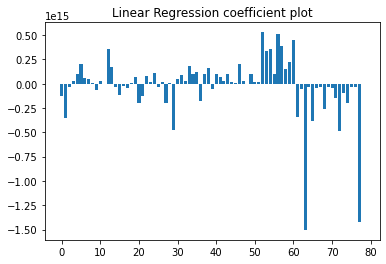

In [29]:
reg = LinearRegression().fit(X_train_scaled, y_train)
print('Model: Linear Regression')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Linear Regression coefficient plot')
plt.show()  

In [53]:
# Fit a LASSO regression to the data
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.21136783332204645

In [56]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso())

In [57]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [58]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.2126955880483805

In [33]:
LR = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {LR.score(X_train_scaled, y_train)}')
print(f'Testing Score: {LR.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.64      0.98      0.78      1651
         4.0       0.08      0.01      0.01       351
         5.0       0.78      0.47      0.59        89
         6.0       0.25      0.04      0.06       109
         7.0       0.00      0.00      0.00        62
         8.0       0.06      0.08      0.07        79
         9.0       0.11      0.06      0.08        52
        10.0       0.12      0.07      0.09        43
        11.0       0.09      0.23      0.13        44
        12.0       0.05      0.03      0.04        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.25      0.02      0.04        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

In [30]:
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.12      0.03      0.05        30
         2.0       0.50      1.00      0.67         1
         3.0       0.64      0.97      0.77      1651
         4.0       0.23      0.02      0.04       351
         5.0       0.76      0.47      0.58        89
         6.0       0.26      0.09      0.14       109
         7.0       0.00      0.00      0.00        62
         8.0       0.07      0.08      0.07        79
         9.0       0.06      0.08      0.06        52
        10.0       0.14      0.07      0.09        43
        11.0       0.08      0.14      0.10        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.20      0.04      0.06        53
        17.0       0.00    

In [45]:
model =  RandomForestRegressor()
model.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [46]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
testing_score

0.1524644640600552

In [48]:
training_score

0.5039898811440593

In [39]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.11      0.03      0.05        30
         2.0       0.50      1.00      0.67         1
         3.0       0.64      0.97      0.77      1651
         4.0       0.24      0.03      0.05       351
         5.0       0.76      0.47      0.58        89
         6.0       0.26      0.09      0.14       109
         7.0       0.00      0.00      0.00        62
         8.0       0.06      0.08      0.07        79
         9.0       0.05      0.08      0.06        52
        10.0       0.14      0.07      0.09        43
        11.0       0.09      0.14      0.11        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.18      0.04      0.06        53
        17.0       0.00    

In [50]:
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.53      0.74      0.62      1651
         4.0       0.00      0.00      0.00       351
         5.0       0.50      0.18      0.26        89
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        62
         8.0       0.00      0.00      0.00        79
         9.0       0.00      0.00      0.00        52
        10.0       0.00      0.00      0.00        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

In [55]:
def model_tester(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = model.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X, y)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.53      0.74      0.62      1651
         4.0       0.00      0.00      0.00       351
         5.0       0.50      0.18      0.26        89
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        62
         8.0       0.00      0.00      0.00        79
         9.0       0.00      0.00      0.00        52
        10.0       0.00      0.00      0.00        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.53      0.74      0.62      1651
         4.0       0.00      0.00      0.00       351
         5.0       0.50      0.18      0.26        89
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        62
         8.0       0.00      0.00      0.00        79
         9.0       0.00      0.00      0.00        52
        10.0       0.00      0.00      0.00        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.63      0.97      0.76      1651
         4.0       0.05      0.00      0.01       351
         5.0       0.68      0.40      0.51        89
         6.0       0.00      0.00      0.00       109
         7.0       0.10      0.27      0.15        62
         8.0       0.03      0.01      0.02        79
         9.0       0.05      0.04      0.04        52
        10.0       0.17      0.19      0.18        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.82      0.25      0.39      1651
         4.0       0.15      0.61      0.24       351
         5.0       0.29      0.40      0.34        89
         6.0       0.00      0.00      0.00       109
         7.0       0.08      0.35      0.14        62
         8.0       0.07      0.06      0.07        79
         9.0       0.08      0.02      0.03        52
        10.0       0.01      0.09      0.02        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.18      0.04      0.06        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.66      0.63      0.65      1651
         4.0       0.05      0.02      0.02       351
         5.0       0.71      0.42      0.52        89
         6.0       0.00      0.00      0.00       109
         7.0       0.08      0.34      0.13        62
         8.0       0.06      0.08      0.07        79
         9.0       0.11      0.08      0.09        52
        10.0       0.01      0.16      0.02        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.74      0.53      0.62      1651
         4.0       0.07      0.06      0.07       351
         5.0       0.69      0.43      0.53        89
         6.0       0.03      0.01      0.01       109
         7.0       0.07      0.68      0.13        62
         8.0       0.07      0.01      0.02        79
         9.0       0.40      0.04      0.07        52
        10.0       0.03      0.09      0.04        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

In [59]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5987990029458419
Testing Score: 0.5754588715159755


In [62]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.11      0.03      0.05        30
         2.0       0.33      1.00      0.50         1
         3.0       0.64      0.97      0.77      1651
         4.0       0.23      0.03      0.05       351
         5.0       0.76      0.47      0.58        89
         6.0       0.26      0.09      0.14       109
         7.0       0.00      0.00      0.00        62
         8.0       0.06      0.08      0.07        79
         9.0       0.05      0.08      0.06        52
        10.0       0.17      0.09      0.12        43
        11.0       0.09      0.14      0.11        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.25      0.04      0.07        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

### Bagging
Instead of having one decision tree, we make 50 random trees and average their output. Decision trees try to make the best decision possible at every point. So if we use the same input, we'll get the same decision tree each time. (And, we won't get a different answer after aggregating.) To get different trees, we give them different inputs by randomly sampling the input dataset. Random sampling with replacement is known as bootstrapping. (We use replacement because a data point might occur multiple times in the random sample.) This method of creating a random ensemble is known as bootstrap aggregating, or bagging.

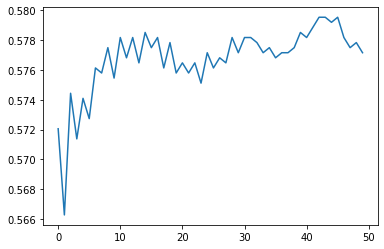

score: 0.5771583956492182


In [64]:
from sklearn.utils import resample

clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

We can go one step further by changing the behavior of the decision trees so that they randomly choose their splits. Counterintuitively, this can increase the accuracy of the model, even though we make each tree worse on its own.

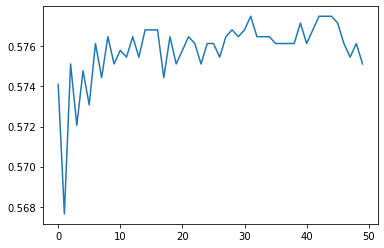

score: 0.5751189666893269


In [65]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

## Boosting

Boosting is another ensemble method that creates many weak learners (classifiers or regressors that do slightly better than chance). Boosting uses their predictions in aggregate to create one accurate prediction. However, unlike Bagging methods, each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [70]:
from boost_helper_functions import bootstrap, get_estimator_weight, new_sample_weights

n_estimators = 50

estimator_weights = np.zeros(n_estimators)
estimators = [DecisionTreeClassifier(max_depth=2) for i in range(n_estimators)]

sample_weights = np.ones(len(X_train_scaled)) / len(X_train_scaled)
for i in range(50):
    estimator = estimators[i]
    
    # Fit the estimator to a bootstrapped sample
    X_bootstrap, y_bootstrap = bootstrap(X_train_scaled, y_train, sample_weights, random_state=1)
    estimator.fit(X_bootstrap, y_bootstrap)
    
    # Calculate the amount that each sample contributes to the total error
    y_predict = estimator.predict(X_train_scaled)
    errors = np.abs(y_predict - y_train)
    normalized_errors = errors / np.abs(y_predict - y_train).max()
        
    # Calculate how much say this estimator should have in the final prediction
    estimator_weights[i] = get_estimator_weight(sample_weights, normalized_errors)
    
    # Calculate which samples the next estimator should focus on more
    sample_weights = new_sample_weights(sample_weights, normalized_errors)
    
y_preds = [reg.predict(X_test_scaled) for reg in estimators]
y_pred = pd.DataFrame(y_preds).median().round()
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'boost_helper_functions'

In [41]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(marine_debris_1_dummies)
pca = PCA(n_components=0.9)
marine_debris_pca = pca.fit_transform(scaled_df)


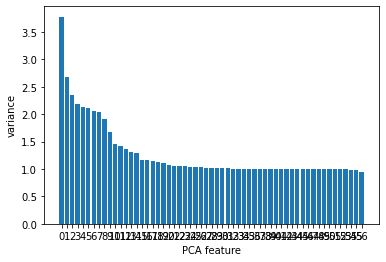

In [42]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [43]:
marine_debris_pca.shape


(11768, 57)

In [44]:
pca.explained_variance_ratio_.sum()

0.9110386352827853

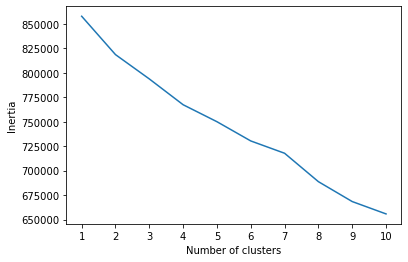

In [45]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
# Initializing model with K = 7 (since we now already know there are seven classes for marine debris)
model = KMeans(n_clusters=7, random_state=5)

In [47]:
# Fitting model
model.fit(marine_debris_pca)

KMeans(n_clusters=7, random_state=5)

In [48]:
# Get predictions
predictions = model.predict(marine_debris_pca)
print(predictions)


[6 6 6 ... 4 4 4]


In [49]:
# Initialize t-SNE model
#number between 10 and 1000, you will get differente results
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


tsne = TSNE(learning_rate=35)

In [50]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [51]:
# Prepare to plot the dataset

# The first column of transformed features
New_df= pd.DataFrame()

New_df['x'] = tsne_features[:,0]

# The second column of transformed features
New_df['y'] = tsne_features[:,1]

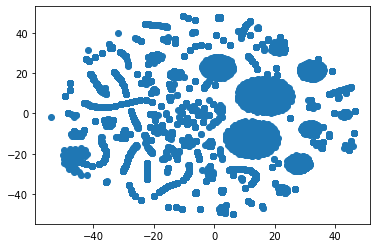

In [52]:
# Visualize the clusters
plt.scatter(New_df['x'], New_df['y'])
plt.show()

In [53]:
New_df

,x,y
0,-8.305186,12.452817
1,-8.321255,12.452738
2,-8.301033,12.454132
3,-8.301033,12.454132
4,-8.301033,12.454132
...,...,...
11763,27.760725,-22.751942
11764,20.916620,-13.023110
11765,21.100964,-12.155457
11766,14.467697,-13.808619


In [54]:
predictions = model.predict(marine_debris_pca)
print(predictions)

[6 6 6 ... 4 4 4]


In [55]:
class_pred = pd.DataFrame(predictions)

In [56]:
New_df['class']=class_pred

In [57]:
New_df

,x,y,class
0,-8.305186,12.452817,6
1,-8.321255,12.452738,6
2,-8.301033,12.454132,6
3,-8.301033,12.454132,6
4,-8.301033,12.454132,6
...,...,...,...
11763,27.760725,-22.751942,4
11764,20.916620,-13.023110,4
11765,21.100964,-12.155457,4
11766,14.467697,-13.808619,4


In [58]:
model.labels_


array([6, 6, 6, ..., 4, 4, 4])

In [59]:
labels=New_df['class']

In [60]:
labels.value_counts()

3    6385
5    2933
4    1689
0     464
2     232
1      45
6      20
Name: class, dtype: int64

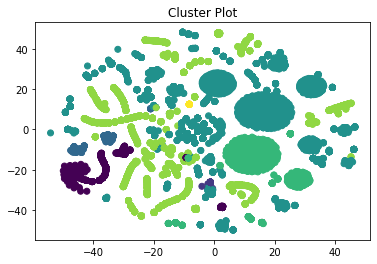

In [64]:
# Visualize the clusters with color
plt.scatter(New_df['x'], New_df['y'], c=labels)
plt.title("Cluster Plot")
plt.savefig("marine_debris_all_years.jpg")
plt.show()

The visual details how there are 7 different clusters. This conveys that in the 7 different oceans there can be varying amount of marine debris. The highest having 6385 points, second highest being 2933, and third highest being 1689. Overall, our oceans are being impacted heavily by human waste (production of boat parts, cloth/clothing, fishing equipment, glass,metals, paper & lumber, plastic, and rubber). Consumption of these items needs to be reduced  and this is something that needs to be a priority of concern.


In [ ]:
# marine_debris_2018_dummies
# marine_debris_2019_dummies
# marine_debris_2020_dummies
# marine_debris_2021_dummies
# marine_debris_2022_dummies

In [162]:
marine_debris_2018_dummies

,itemname_Other,itemname_Test Item,material_PAPER & LUMBER,location_Hamilton County,location_Mexico,location_Oconee County,quantity,radius
3273,0.0,1.0,1.0,0.0,0.0,1.0,10.0,1.0
3274,0.0,1.0,1.0,1.0,0.0,0.0,10.0,1.0
3275,0.0,1.0,1.0,0.0,0.0,1.0,10.0,1.0
3286,1.0,0.0,1.0,0.0,1.0,0.0,10.0,1.0


In [163]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(marine_debris_2018_dummies)
pca = PCA(n_components=0.9)
marine_debris_2018_dummies_pca = pca.fit_transform(scaled_df)

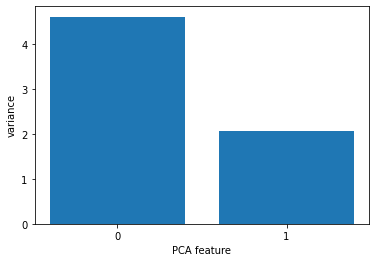

In [164]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [165]:
marine_debris_2018_dummies_pca.shape

(4, 2)

In [166]:
marine_debris_2018_dummies_pca

array([[-1.1948988 , -0.95160401],
       [-0.81986866,  2.08034021],
       [-1.1948988 , -0.95160401],
       [ 3.20966626, -0.1771322 ]])

In [167]:
pca.explained_variance_ratio_.sum()

1.0

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


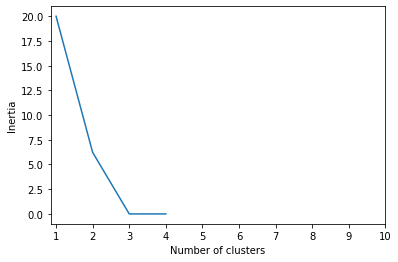

In [168]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_2018_dummies_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [169]:
# Initializing model with K = 3
model = KMeans(n_clusters=3, random_state=5)

In [170]:
# Fitting model
model.fit(marine_debris_2018_dummies_pca)

KMeans(n_clusters=3, random_state=5)

In [171]:
# Get predictions
predictions = model.predict(marine_debris_2018_dummies_pca)
print(predictions)

[1 2 1 0]


In [172]:
tsne = TSNE(learning_rate=35)

In [173]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_2018_dummies_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [174]:
# Prepare to plot the dataset

# The first column of transformed features
New_df_18= pd.DataFrame()

New_df_18['x'] = tsne_features[:,0]

# The second column of transformed features
New_df_18['y'] = tsne_features[:,1]

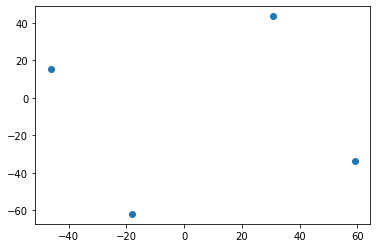

In [175]:
# Visualize the clusters
plt.scatter(New_df_18['x'], New_df_18['y'])
plt.show()

In [176]:
predictions = model.predict(marine_debris_2018_dummies_pca)
print(predictions)

[1 2 1 0]


In [177]:
class_pred = pd.DataFrame(predictions)

In [178]:
New_df_18['class']=class_pred

In [179]:
labels=New_df_18['class']

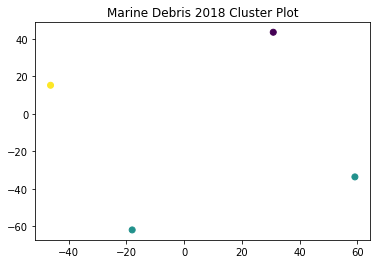

In [181]:
# Visualize the clusters with color
plt.scatter(New_df_18['x'], New_df_18['y'], c=labels)
plt.title("Marine Debris 2018 Cluster Plot")
plt.savefig("marine_debris_2018.jpg")
plt.show()


In [182]:
 marine_debris_2019_dummies

,itemname_Aluminum or Tin Cans,itemname_Bait Containers,itemname_Balloon and/or String,itemname_Buoys and floats,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Fishing Net,itemname_Fishing Traps,itemname_Fishing lures and lines,...,location_British Indian Ocean Territory,location_Canada,location_Cayman Islands,location_Fiji,location_Portugal,location_Seychelles,location_Spain,location_The Bahamas,quantity,radius
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,2.0
4267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,3.0
4270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0
4271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0


In [183]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(marine_debris_2019_dummies)
pca = PCA(n_components=0.9)
marine_debris_2019_dummies_pca = pca.fit_transform(scaled_df)

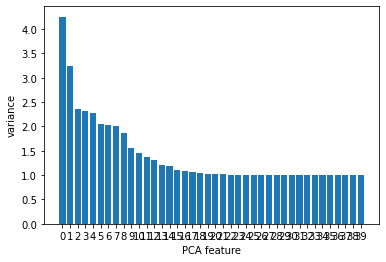

In [184]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [185]:
marine_debris_2019_dummies_pca.shape

(1328, 40)

In [186]:
pca.explained_variance_ratio_.sum()

0.9163958868127662

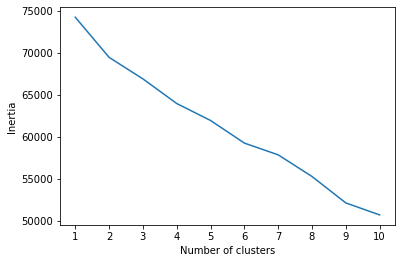

In [187]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_2019_dummies_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [188]:
# Initializing model with K = 6 (6 or 9)
model = KMeans(n_clusters=6, random_state=5)

In [189]:
# Fitting model
model.fit(marine_debris_2019_dummies_pca)

KMeans(n_clusters=6, random_state=5)

In [190]:
# Get predictions
predictions = model.predict(marine_debris_2019_dummies_pca)
print(predictions)

[1 1 1 ... 3 3 2]


In [191]:
tsne = TSNE(learning_rate=35)

In [192]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_2019_dummies_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [193]:
# Prepare to plot the dataset

# The first column of transformed features
New_df_19= pd.DataFrame()

New_df_19['x'] = tsne_features[:,0]

# The second column of transformed features
New_df_19['y'] = tsne_features[:,1]

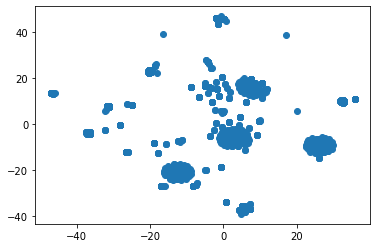

In [194]:
# Visualize the clusters
plt.scatter(New_df_19['x'], New_df_19['y'])
plt.show()

In [195]:
predictions = model.predict(marine_debris_2019_dummies_pca)
print(predictions)

[1 1 1 ... 3 3 2]


In [196]:
class_pred = pd.DataFrame(predictions)

In [197]:
New_df_19['class']=class_pred

In [198]:
labels=New_df_19['class']

In [199]:
labels.value_counts()

3    1003
0     287
4      22
1      11
5       4
2       1
Name: class, dtype: int64

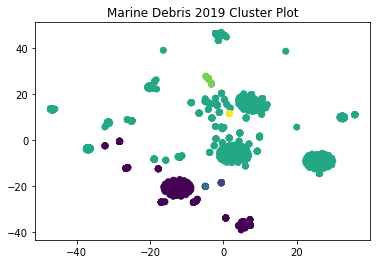

In [200]:
# Visualize the clusters with color
plt.scatter(New_df_19['x'], New_df_19['y'], c=labels)
plt.title("Marine Debris 2019 Cluster Plot")
plt.savefig("marine_debris_2019.jpg")
plt.show()

In [201]:
marine_debris_2020_dummies

,itemname_Balloon and/or String,itemname_Buoys and floats,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Fishing Net,itemname_Foam Fragment,itemname_Foam or Plastic Cups or Plates,itemname_Glass Bottle,itemname_Glass Fragments,...,material_METAL,material_OTHER ITEMS,material_PAPER & LUMBER,material_PLASTIC,location_Bermuda,location_British Indian Ocean Territory,location_Cayman Islands,location_United States,quantity,radius
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,1.0
441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0
442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0
443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,10.0,2.0
4261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,10.0
4263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,10.0,1.0
4268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,10.0,2.0


In [202]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(marine_debris_2020_dummies)
pca = PCA(n_components=0.9)
marine_debris_2020_dummies_pca = pca.fit_transform(scaled_df)

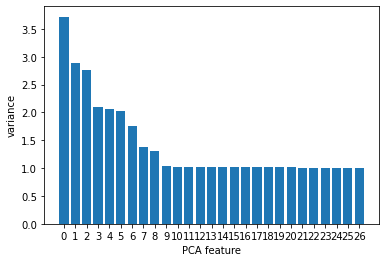

In [203]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [204]:
marine_debris_2020_dummies_pca.shape

(262, 27)

In [205]:
pca.explained_variance_ratio_.sum()

0.907450714743378

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


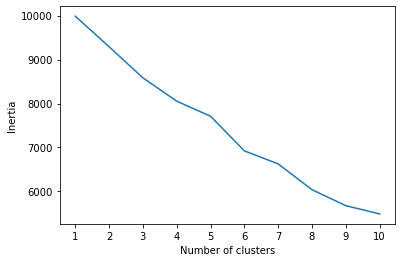

In [206]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_2020_dummies_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [207]:
# Initializing model with K = 6 
model = KMeans(n_clusters=6, random_state=5)

In [208]:
# Fitting model
model.fit(marine_debris_2020_dummies_pca)

KMeans(n_clusters=6, random_state=5)

In [209]:
# Get predictions
predictions = model.predict(marine_debris_2020_dummies_pca)
print(predictions)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 1 1 1 0 0 0 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [210]:
tsne = TSNE(learning_rate=35)

In [211]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_2020_dummies_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [212]:
# Prepare to plot the dataset

# The first column of transformed features
New_df_20= pd.DataFrame()

New_df_20['x'] = tsne_features[:,0]

# The second column of transformed features
New_df_20['y'] = tsne_features[:,1]

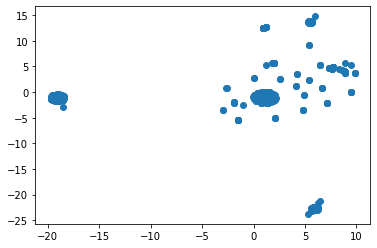

In [213]:
# Visualize the clusters
plt.scatter(New_df_20['x'], New_df_20['y'])
plt.show()

In [214]:
predictions = model.predict(marine_debris_2020_dummies_pca)
print(predictions)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 1 1 1 0 0 0 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [215]:
class_pred = pd.DataFrame(predictions)

In [216]:
New_df_20['class']=class_pred

In [217]:
labels=New_df_20['class']

In [218]:
labels.value_counts()

2    104
0     83
4     38
5     33
1      3
3      1
Name: class, dtype: int64

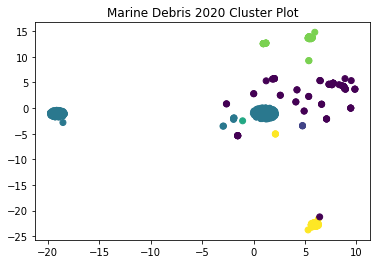

In [219]:
# Visualize the clusters with color
plt.scatter(New_df_20['x'], New_df_20['y'], c=labels)
plt.title("Marine Debris 2020 Cluster Plot")
plt.savefig("marine_debris_2020.jpg")
plt.show()

In [220]:
marine_debris_2021_dummies

,itemname_Aerosol cans,itemname_Aluminum or Tin Cans,itemname_Balloon and/or String,itemname_Buoys and floats,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Fishing lures and lines,itemname_Flip-flops,itemname_Foam Fragment,...,material_RUBBER,location_Bogota,location_British Indian Ocean Territory,location_India,location_Portugal,location_The Bahamas,location_Turkey,location_Vietnam,quantity,radius
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62.0,1.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62.0,1.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
11765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
11766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
11767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0


In [221]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(marine_debris_2021_dummies)
pca = PCA(n_components=0.9)
marine_debris_2021_dummies_pca = pca.fit_transform(scaled_df)

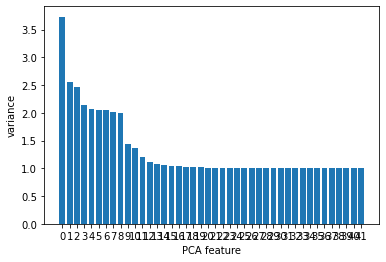

In [222]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [223]:
marine_debris_2021_dummies_pca.shape

(7878, 42)

In [224]:
pca.explained_variance_ratio_.sum()

0.9105173782882736

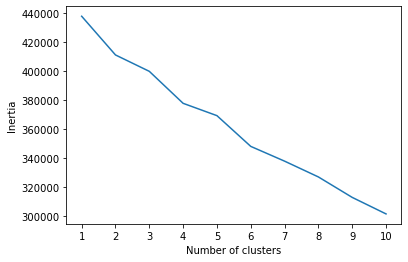

In [225]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_2021_dummies_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [226]:
# Initializing model with K = 4
model = KMeans(n_clusters=4, random_state=5)

In [227]:
# Fitting model
model.fit(marine_debris_2021_dummies_pca)

KMeans(n_clusters=4, random_state=5)

In [228]:
# Get predictions
predictions = model.predict(marine_debris_2021_dummies_pca)
print(predictions)

[0 0 0 ... 2 2 2]


In [229]:
tsne = TSNE(learning_rate=35)

In [230]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_2021_dummies_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [231]:
# Prepare to plot the dataset

# The first column of transformed features
New_df_21= pd.DataFrame()

New_df_21['x'] = tsne_features[:,0]

# The second column of transformed features
New_df_21['y'] = tsne_features[:,1]

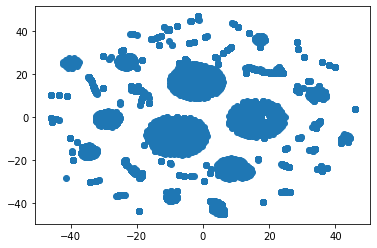

In [232]:
# Visualize the clusters
plt.scatter(New_df_21['x'], New_df_21['y'])
plt.show()

In [233]:
predictions = model.predict(marine_debris_2021_dummies_pca)
print(predictions)

[0 0 0 ... 2 2 2]


In [234]:
class_pred = pd.DataFrame(predictions)

In [235]:
New_df_21['class']=class_pred

In [236]:
labels=New_df_21['class']

In [237]:
labels.value_counts()

2    5028
1    1678
0    1126
3      46
Name: class, dtype: int64

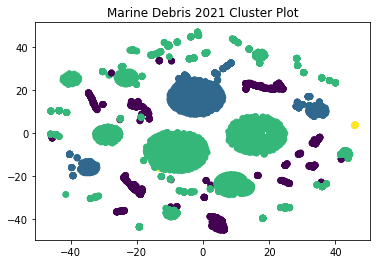

In [238]:
# Visualize the clusters with color
plt.scatter(New_df_21['x'], New_df_21['y'], c=labels)
plt.title("Marine Debris 2021 Cluster Plot")
plt.savefig("marine_debris_2021.jpg")
plt.show()

In [239]:
marine_debris_2022_dummies

,itemname_Aluminum or Tin Cans,itemname_Balloon and/or String,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Flip-flops,itemname_Foam or Plastic Cups or Plates,itemname_Lumber/Building Materials,itemname_Metal Bottle Caps or Tabs,itemname_Non-Rubber Gloves,...,itemname_Towels or rags,material_BOAT PARTS,material_GLASS,material_METAL,material_PAPER & LUMBER,material_PLASTIC,material_RUBBER,location_Vietnam,quantity,radius
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,1.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,1.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1700.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,1.0
10095,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,18.0,1.0
10096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0
10097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0


In [240]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(marine_debris_2022_dummies)
pca = PCA(n_components=0.9)
marine_debris_2022_dummies_pca = pca.fit_transform(scaled_df)

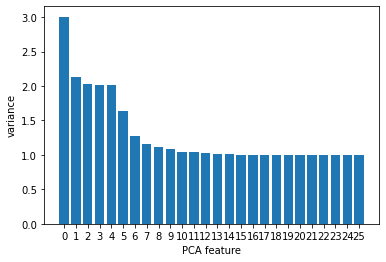

In [241]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [242]:
marine_debris_2022_dummies_pca.shape

(2296, 26)

In [243]:
pca.explained_variance_ratio_.sum()

0.9078768701035221

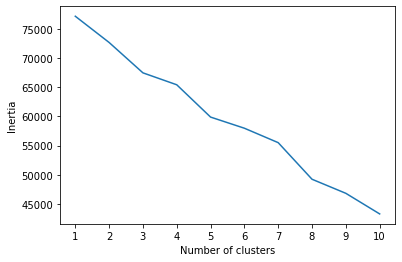

In [244]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_2022_dummies_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [245]:
# Initializing model with K = 5
model = KMeans(n_clusters=5, random_state=5)

In [246]:
# Fitting model
model.fit(marine_debris_2022_dummies_pca)

KMeans(n_clusters=5, random_state=5)

In [247]:
# Get predictions
predictions = model.predict(marine_debris_2022_dummies_pca)
print(predictions)

[3 3 3 ... 4 4 4]


In [248]:
tsne = TSNE(learning_rate=35)

In [249]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_2022_dummies_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [250]:
# Prepare to plot the dataset

# The first column of transformed features
New_df_22= pd.DataFrame()

New_df_22['x'] = tsne_features[:,0]

# The second column of transformed features
New_df_22['y'] = tsne_features[:,1]

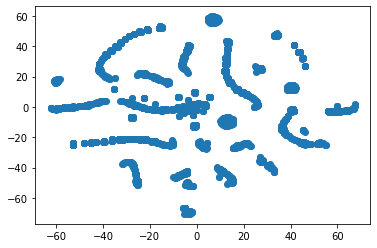

In [251]:
# Visualize the clusters
plt.scatter(New_df_22['x'], New_df_22['y'])
plt.show()

In [252]:
predictions = model.predict(marine_debris_2022_dummies_pca)
print(predictions)

[3 3 3 ... 4 4 4]


In [253]:
class_pred = pd.DataFrame(predictions)

In [254]:
New_df_22['class']=class_pred

In [255]:
labels=New_df_22['class']

In [256]:
labels.value_counts()

0    1752
2     514
1      13
4      12
3       5
Name: class, dtype: int64

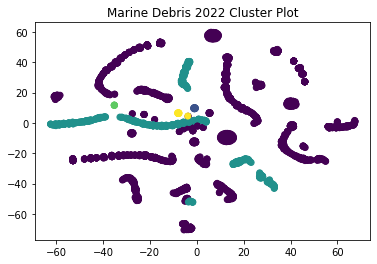

In [257]:
# Visualize the clusters with color
plt.scatter(New_df_22['x'], New_df_22['y'], c=labels)
plt.title("Marine Debris 2022 Cluster Plot")
plt.savefig("marine_debris_2022.jpg")
plt.show()